In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [30]:
df=pd.read_csv(r'rideshare_kaggle.csv')
# df = df.iloc[:1000]

#### Understanding Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [31]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544049e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,7.056569e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.550000e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


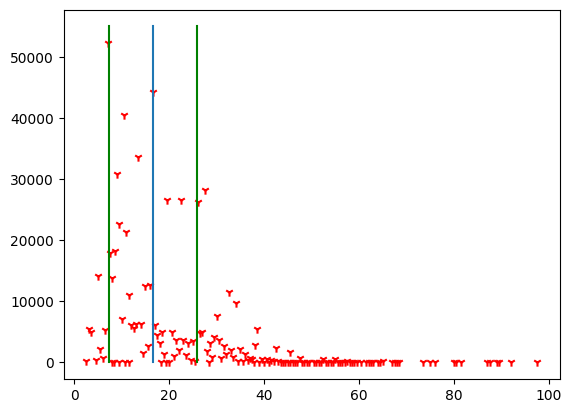

In [68]:
sd = np.std(df['price'])
mean = df['price'].mean()
size = len(df['price'].unique())
freq = {}
for data in df['price'].unique() :
    freq[data] = len(df[df.price == data])
plt.plot([mean,mean],[0,55000])
plt.plot([mean-sd,mean-sd],[0,55000],color = "green")
plt.plot([mean+sd,mean+sd],[0,55000],color = "green")
plt.scatter(freq.keys(),freq.values(),marker = '1',color = 'red')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1013a6370>,
 'caps': [<matplotlib.lines.Line2D at 0x1a10137ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1013a60a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1013a6d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1013b5040>],
 'means': []}

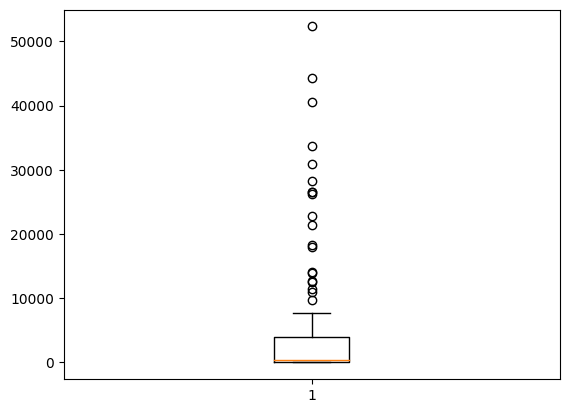

In [71]:
plt.boxplot(freq.values())


In [32]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

<BarContainer object of 9 artists>

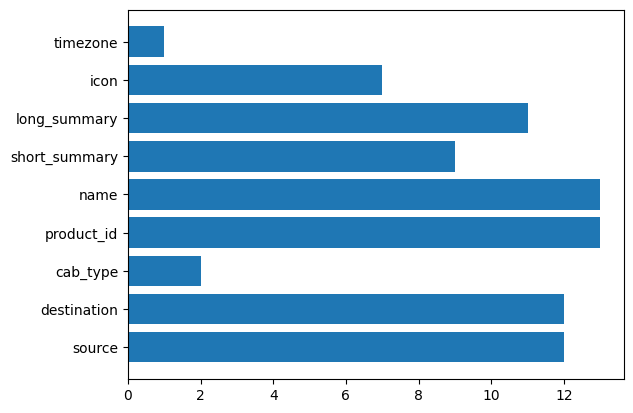

In [33]:
col_list = ['source','destination','cab_type','product_id','name','short_summary','long_summary','icon','timezone']
unique_val = []
for data in col_list :
    unique_val += [len(pd.unique(df[data]))]
plt.barh(col_list,unique_val)

#### Data preprocessing

In [31]:
df = df.dropna()
N = df.shape[0]

In [32]:
df.loc[df.cab_type=='Uber','product_id'] = 'Uber'
df = df.drop("id",axis="columns")
df = df.drop("timezone",axis="columns")

## From here

In [10]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

In [11]:
New_df = df[['source','destination','cab_type','distance','product_id','price']]
New_df = pd.get_dummies(New_df,columns=['source','destination','cab_type','product_id'],drop_first=True);

In [ ]:
df_with_na=pd.DataFrame()
df_with_na=df_with_na.append(New_df.iloc[rows_with_nan])

df_noNull=New_df.dropna()


In [13]:
x_noNull = df_noNull.drop("price",axis="columns")
y_noNull=df_noNull[['price']]


ml_model = linear_model.LinearRegression()
ml_model.fit(x_noNull, y_noNull)

x_with_Null = df_with_na.drop("price",axis="columns")
y_with_Null = ml_model.predict(x_with_Null)
df.loc[rows_with_nan,'price'] = y_with_Null

## To here

In [36]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparent

#### Data visualization

Text(0, 0.5, 'Average price (in $)')

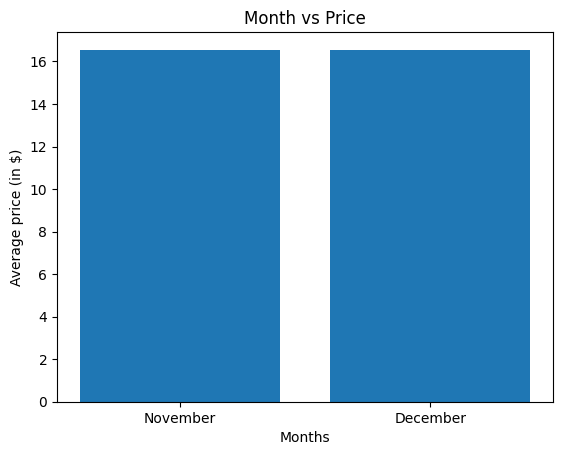

In [70]:
## Month vs price
lst = []
for i in range(11,13) :
    price = df.loc[df.month==i]['price'].mean()
    lst += [price]
plt.bar(['November','December'],lst)
plt.title("Month vs Price")
plt.xlabel("Months")
plt.ylabel("Average price (in $)")

[16.574769014461705, 16.513778031166858, 16.561803365877747, 16.539717978848415, 16.57931100478469, 16.537216786257883, 16.519326360997336, 16.491626689925862, 16.603326319559475, 16.51257826266262, 16.501020846765527, 16.55850568954412, 16.485526644537245, 16.54974443292705, 16.54988204175007, 16.524813406057127, 16.513990776490775, 16.6079964381122, 16.516846698619357, 16.552437229437228, 16.599207961007313, 16.604323065482014, 16.59535673421179, 16.501090103900527]


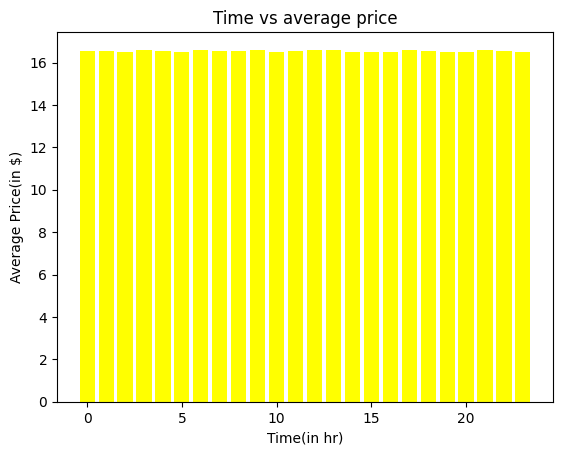

In [45]:
## time vs average price
lst = df['hour'].unique()
num = [0]*24
for data in lst :
    num[data] = df[df.hour==data]['price'].mean()
plt.bar(lst,num,color = "yellow")
plt.title("Time vs average price")
plt.xlabel("Time(in hr)")
plt.ylabel("Average Price(in $)")


[29872, 26310, 26323, 25530, 26125, 22995, 25147, 22930, 22337, 26673, 27918, 27946, 28017, 27977, 27976, 27868, 27972, 28075, 27958, 25410, 24620, 25549, 27093, 29355]


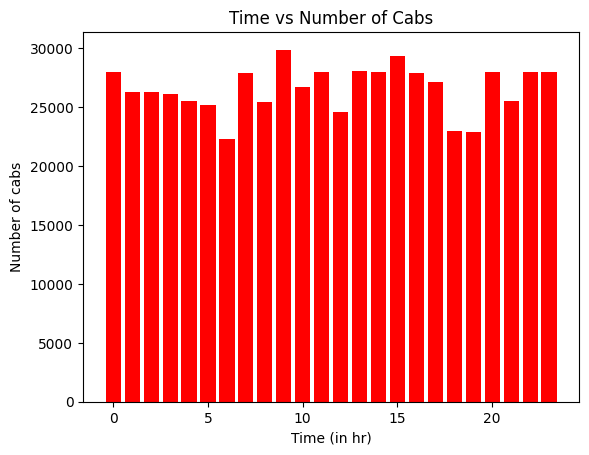

In [44]:
## time vs number of cabs
lst = df['hour'].unique()
num = [0]*24
for data in lst :
    num[data] = len(df[df.hour==data])


plt.bar(lst,num,color = "red")
plt.title("Time vs Number of Cabs")
plt.xlabel("Time (in hr)")
plt.ylabel("Number of cabs")

Text(0, 0.5, 'Price')

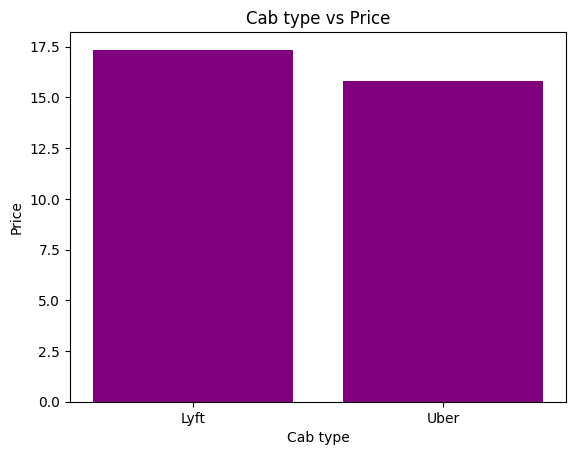

In [40]:
## cab type vs price
lst = df['cab_type'].unique()
avg_price = []
for data in lst :
    new_df = df[df.cab_type == data]
    avg_price += [new_df['price'].mean()]
plt.bar(lst,avg_price,color = "purple")
plt.title("Cab type vs Price")
plt.xlabel("Cab type")
plt.ylabel("Price")

Text(0.5, 0, 'Price')

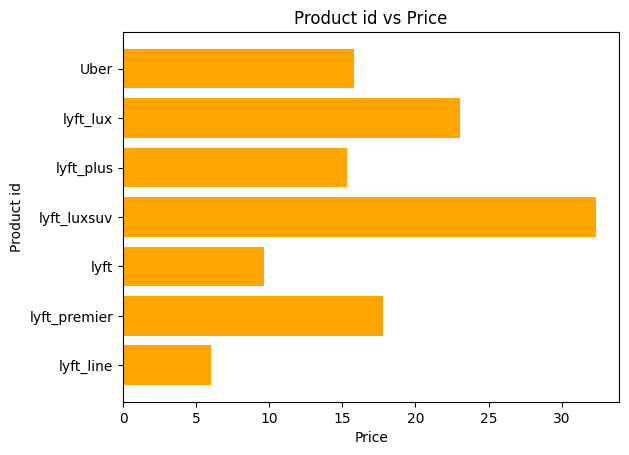

In [41]:
## product id vs price
lst = df['product_id'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.product_id == data]['price'].mean()]
plt.barh(lst,avg_price,color = "orange")
plt.title("Product id vs Price")
plt.ylabel("Product id")
plt.xlabel("Price")

Text(0, 0.5, 'Climate conditions')

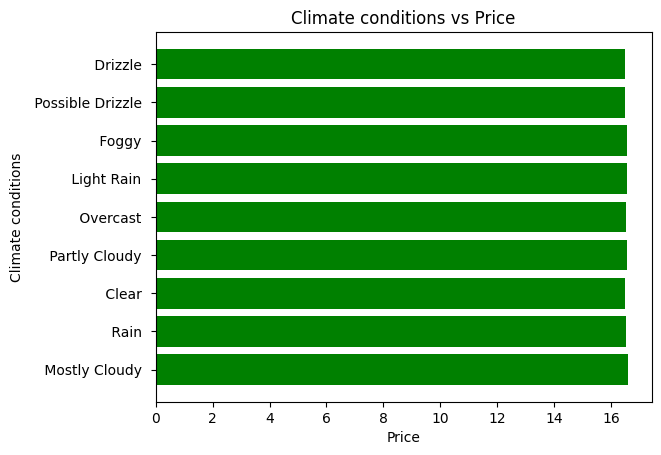

In [60]:
## climate conditions vs price
lst = df['short_summary'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.short_summary==data]['price'].mean()]
plt.barh(lst,avg_price,color = "green")
plt.title("Climate conditions vs Price")
plt.xlabel("Price")
plt.ylabel("Climate conditions")

Text(0, 0.5, 'Source')

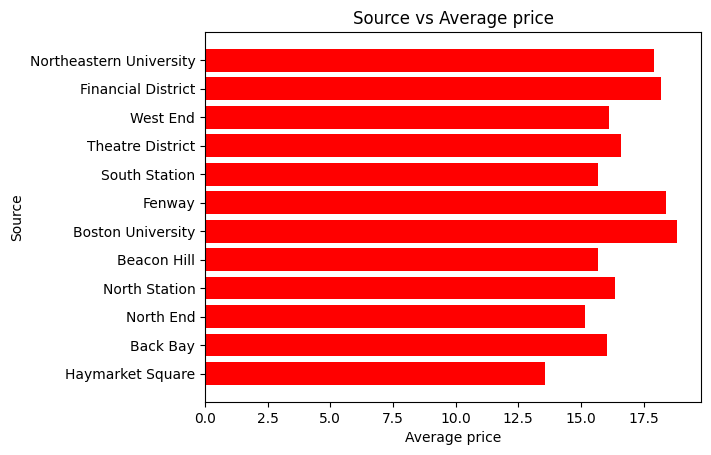

In [83]:
## source vs avg price
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.source == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "red")
plt.title("Source vs Average price")
plt.xlabel("Average price")
plt.ylabel("Source")

Text(0, 0.5, 'Destination')

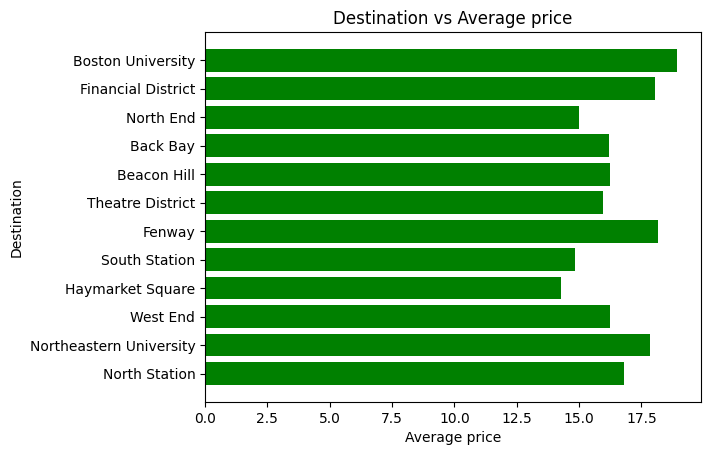

In [84]:
## destinations vs avg price
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.destination == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Average price")
plt.xlabel("Average price")
plt.ylabel("Destination")

{'Haymarket Square': 3147, 'Back Bay': 3201, 'North End': 3171, 'North Station': 2576, 'Beacon Hill': 2841, 'Boston University': 3172, 'Fenway': 3166, 'South Station': 3160, 'Theatre District': 3201, 'West End': 2980, 'Financial District': 4197, 'Northeastern University': 3164}


Text(0, 0.5, 'Source')

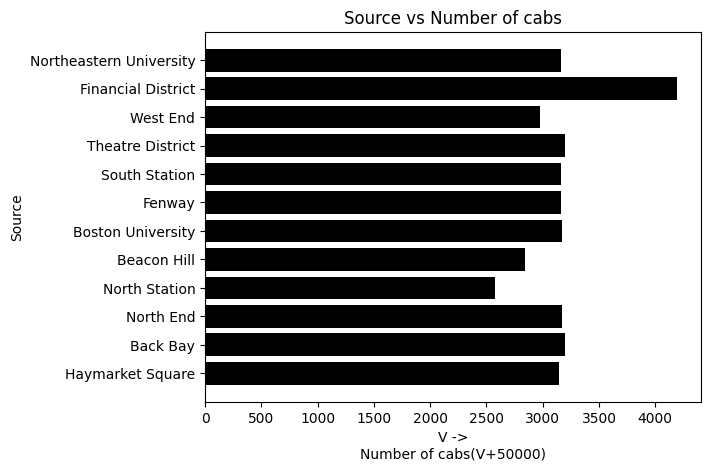

In [73]:
## source vs number of cabs
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.source == data])-50000
print(Dist)
plt.barh(list(Dist.keys()),list(Dist.values()),color = "black")
plt.title("Source vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Source")

Text(0, 0.5, 'Destinations')

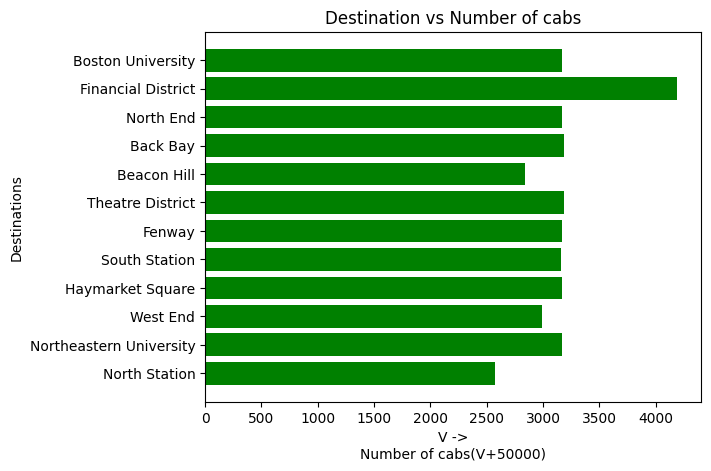

In [75]:
## destinations vs number of cabs
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.destination == data])-50000
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Destinations")


#### Data encoding

In [38]:
New_df = pd.get_dummies(df,columns=['source','destination','cab_type','product_id','name','short_summary','long_summary','icon'],drop_first=True)

#### Predicting Price

In [41]:
x = New_df.drop(['price','datetime'],axis='columns')
y = New_df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=69);

model = linear_model.LinearRegression()
model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print(r2_score(y_test,pred_val))

0.9280997154088444


In [28]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparent

In [35]:
## removing the unwanted features 
New_df = df[['hour','day','month','source','destination','cab_type','product_id','name','price','distance','surge_multiplier','short_summary']]
New_df = pd.get_dummies(New_df,columns = ['source','destination','cab_type','product_id','name','short_summary'],drop_first = True)
x = New_df.drop(['price'],axis = "columns")
y = New_df['price']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state=69)
model = linear_model.LinearRegression()

model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print(r2_score(y_test,pred_val))

0.9280997154088444
